Moral Circles
===

In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['figure.dpi'] = 150

In [3]:
dfs = pd.read_excel("waytz_2019_source_data.xlsx", sheet_name=None)
len(dfs)

6

In [4]:
dfs.keys()

dict_keys(['Figure 1', 'Figure 2', 'Figure 3', 'Figure 4', 'Figure 5', 'Figure 6'])

In [5]:
df4 = dfs["Figure 4"]
df5 = dfs["Figure 5"]
df4.shape, df5.shape

((131, 3), (131, 3))

In [6]:
df4.head(2)

,political ideology,human,nonhuman
0,5,9.666667,1.857143
1,4,9.777778,1.714286


In [7]:
df4 = df4.rename(columns={"political ideology": "political_ideology"})

In [10]:
# for the blog post: a markdown table with detailed ideology breakdown
print(df4.political_ideology.value_counts().sort_index().to_markdown())

|   political_ideology |   count |
|---------------------:|--------:|
|                    1 |      11 |
|                    2 |      35 |
|                    3 |      18 |
|                    4 |      31 |
|                    5 |      10 |
|                    6 |      16 |
|                    7 |      10 |


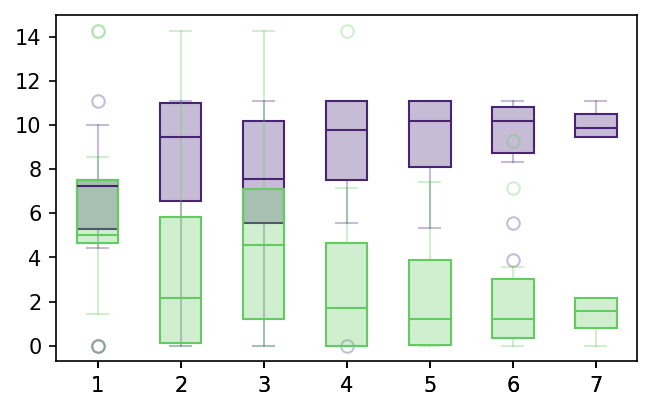

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))


political_ideologies = np.array([1, 2, 3, 4, 5, 6, 7])
#ax.violinplot(
#    [df4[df4.political_ideology == p].human for p in political_ideologies],
#    showmeans=True,
#)
#ax.violinplot(
#    [df4[df4.political_ideology == p].nonhuman for p in political_ideologies],
#    showmeans=True,
#)
for category, color in (
    ("human", matplotlib.cm.viridis(0.1)), 
    ("nonhuman", matplotlib.cm.viridis(0.76))):
    alphacolor = list(color)
    alphacolor[-1] = 0.3
    bplot= ax.boxplot(
        [df4[df4.political_ideology == p][category] for p in political_ideologies],
        meanline=False,
        patch_artist=True,
        flierprops={"markeredgecolor": alphacolor},
    )
    for key in bplot.keys():
        for patch in bplot[key]:
            if key in ["means", "boxes"]:
                patch.set_edgecolor(color)
                patch.set_facecolor(alphacolor)
            elif key == "medians":
                patch.set_color(color)
            else:
                patch.set_color(alphacolor)

plt.show()